#  Bike Sharing Data Set
##Julie Goulet 
email:julie.goulet@yale.edu


I was asked to do an explorative data analysis and prediction model for the hourly uttilization of cnt (count of total rental bike) for the  bike sharing data set.  As I was ask to do not spend more than a few hour in the analysis, I decided to limit myself, first, to explore how much information we can get from a linear model based on independant variable having the highest correlation coefficient with the cnt variable. To keep the variable linearly independant I excluded duplication of variable that were having a large correlation with cnt, but were also higly corrolated with each other. In this, case I kept only the variable with the highest corrolation with cnt. After that I tested my linear model do not predict well the output, I will show that a Random Forrest Regressor can produce a better result using the exact same variable. After I interpreted the result, I will propose some next steps to ameliorate the model and our hability of predict accurate results. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

There is two data sets available. The first one hour.csv contains information about the bike sharing counts agreagated on hourly basis. Whereas day.csv is the bike sharing agregated on daily basis. I load the hour data set since it is the one we were ask to make a predictive model for.

In [2]:
df_hour=pd.read_csv("hour.csv") #load the file containing the data for each hours


In [3]:
df_hour.shape

(17379, 17)

In [4]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df_hour[["temp","atemp", "hum", "windspeed","casual", "registered", "cnt"]].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Since the attribute "describe" gives the mean numerical property. 
I filtered the data that were categorical, where a "mean" and a "standard deviation" 
have less meaning.

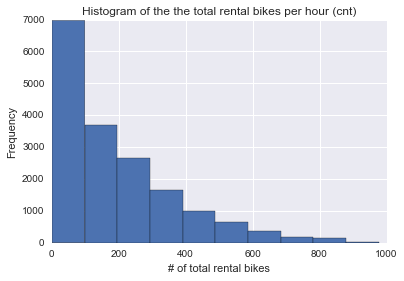

In [7]:
histo_cnt_hour=df_hour['cnt'].plot.hist()
histo_cnt_hour.set_xlabel('# of total rental bikes')
histo_cnt_hour.set_title('Histogram of the the total rental bikes per hour (cnt)')

I want to construct a new data frame for the hour data set containing only the entry during the day say  from 6AM to 22PM (I do not expect a lot bike beeing rent during night). Just to see if the distribution will change and maybe the data will be more linear.


In [8]:
df_hour_during_day=df_hour.loc[(df_hour["hr"]>6) & (df_hour["hr"]<22), :]



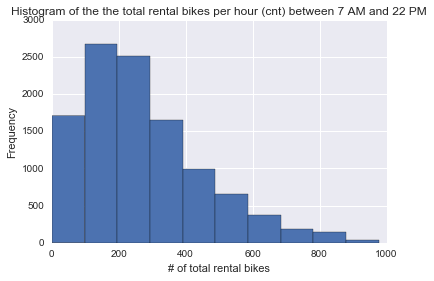

In [9]:
histo_cnt_hour_during_day=df_hour_during_day['cnt'].plot.hist()
histo_cnt_hour_during_day.set_xlabel('# of total rental bikes')
histo_cnt_hour_during_day.set_title('Histogram of the the total rental bikes per hour (cnt) between 7 AM and 22 PM')


In [10]:
df_hour_during_day["cnt"].describe()


count    10922.000000
mean       272.064182
std        179.173595
min          1.000000
25%        139.000000
50%        233.000000
75%        367.000000
max        977.000000
Name: cnt, dtype: float64

In [11]:
df_hour["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

## Looking at the corrolation between the variable


My first attempt to measure the corrolation between variable is to look at the linear corrolation between variable. A good test for that is the Pearson corrolation coefficient. It is expressed as $\rho_{X,Y}=\frac{\textrm{cov}(X,Y)}{\sigma_{X} \sigma_{Y}}$. Where $\textrm{cov}(X,Y)$ is the covariance between variables $X$ and $Y$ and $\sigma_X$, $\sigma_Y$ are the standard deviation population of each population. 

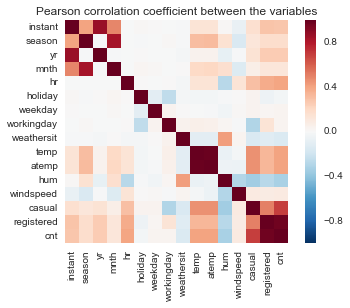

In [12]:
cm_hour=df_hour.corr() #calculation of the Pearson corrolation coefficient between the variables
sns.heatmap(cm_hour,square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Pearson corrolation coefficient between the variables")

This matrix show us the Pearson-corrolation coefficient between the variable. In order to construct a good specific linear model we have to choose the variable with the  stronger absolute value that are *independant* from each other. As we want to explain cnt we can see that it corrolates most instant, yr, hr, temp, atemp, hum, casual and register. However, causual and registered are not independant of cnt ($\mathrm{cnt}=\mathrm{causual}+ \mathrm{registered}$). Also variable such as instant and yr is high  and temp and a temp also. I, therefore, suggest to test a linear model with independant variable instant, hr, atemp and hum. We will first construct scater plot between theses variable and cnt. 

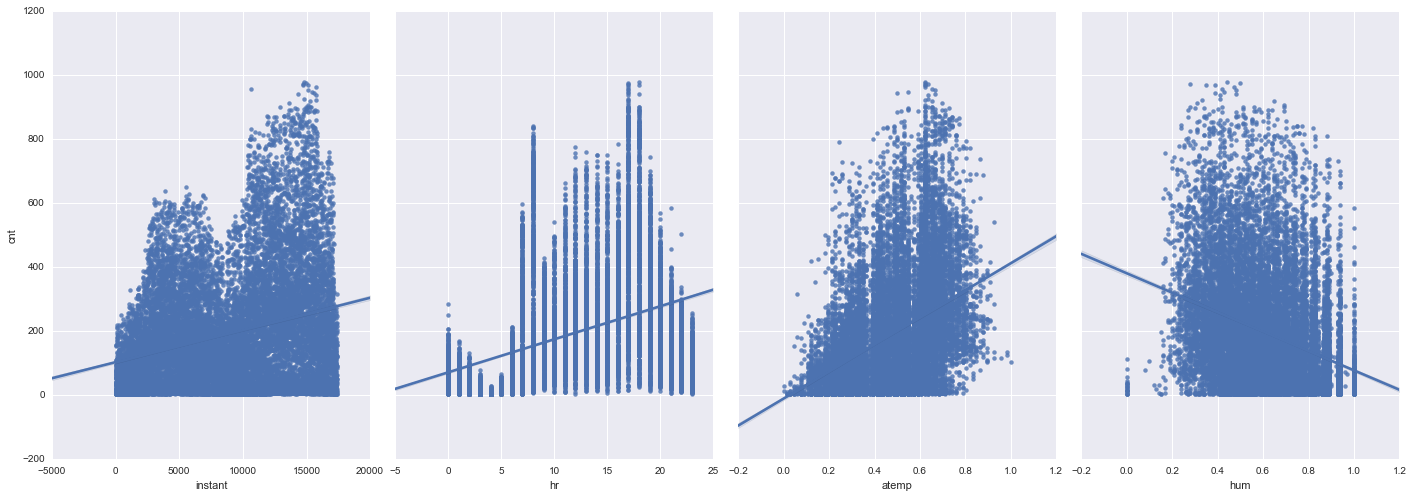

In [13]:

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_hour, x_vars=['instant','hr','atemp','hum'], y_vars='cnt', size=7, aspect=0.7,kind='reg')

They seems tp be some linear correlation between theses variable. Here, I suggest also to look at the data only between 6 AM and 8 PM since at least for the hour variable it is clear that there is much less renting during night. 

In [14]:
df_hour_during_day=df_hour.loc[(df_hour["hr"]>5) & (df_hour["hr"]<21), :]

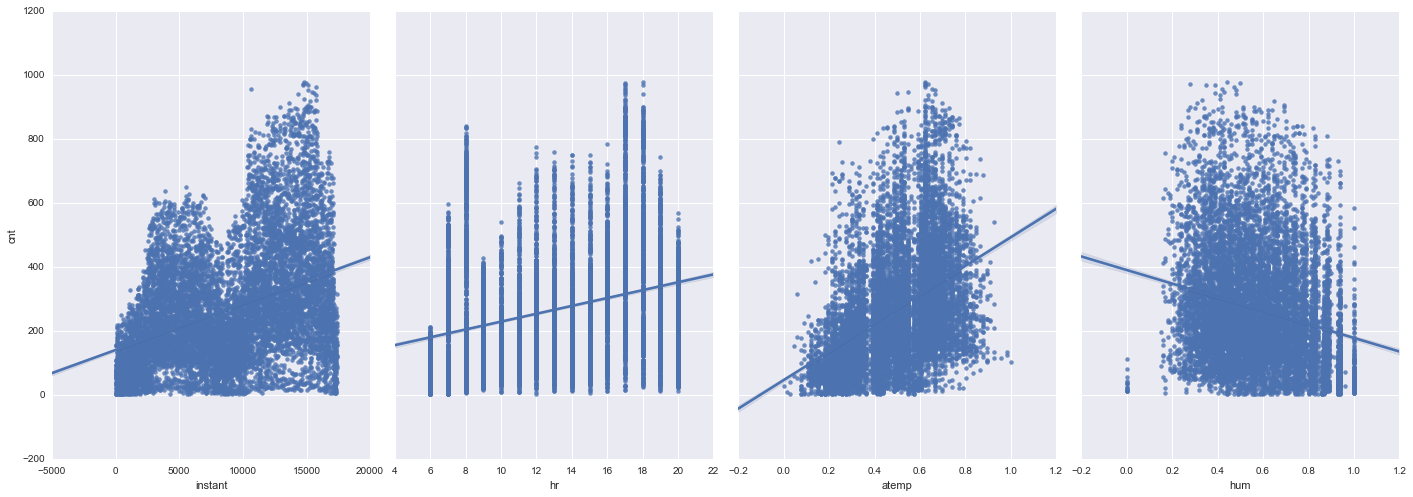

In [15]:
sns.pairplot(df_hour_during_day, x_vars=['instant','hr','atemp','hum'], y_vars='cnt', size=7, aspect=0.7,kind='reg')

## Linear Regression: Model and Test

In this section, we will construct a linear model using sklearn and test it with the 10% sample. Since the linear relation seems to be different during night we will also look at linear model selecting the data for the bike renting only between 6 AM and 18 PM to see if we ameliorate the model with that. 

In [16]:
lm1=smf.ols(formula='cnt ~ instant + hr + atemp +hum',data=df_hour).fit()
lm1.params

Intercept      2.285248
instant        0.008614
hr             7.594908
atemp        335.172007
hum         -214.976418
dtype: float64

In [17]:
lm2=smf.ols(formula='cnt~instant + hr + atemp + hum',data=df_hour_during_day).fit()
lm2.params

Intercept    -54.080975
instant        0.012788
hr             8.303495
atemp        349.947694
hum         -121.795555
dtype: float64

In [18]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2680.
Date:                Sun, 24 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:14:07   Log-Likelihood:            -1.1087e+05
No. Observations:               17379   AIC:                         2.217e+05
Df Residuals:                   17374   BIC:                         2.218e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2852      5.671      0.403      0.687        -8.830    13.400
instant        0.0086      0.000     39.540      0.000         0.008     0.009
hr             7.5949      0.164     46.263      0.000         7.273     7.917
atemp        335.1720      6.418     52.223      0.000       322.592   347.752
hum         -214.9764      5.838    -36.824      0.000      -226.419  -203.534
==============================================================================
Omnibus:                     3518.732   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6999.084
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.926   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1607.
Date:                Sun, 24 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:14:07   Log-Likelihood:                -69869.
No. Observations:               10919   AIC:                         1.397e+05
Df Residuals:                   10914   BIC:                         1.398e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -54.0810      8.338     -6.486      0.000       -70.425   -37.737
instant        0.0128      0.000     45.712      0.000         0.012     0.013
hr             8.3035      0.342     24.264      0.000         7.633     8.974
atemp        349.9477      8.065     43.393      0.000       334.140   365.756
hum         -121.7956      7.528    -16.179      0.000      -136.552  -107.039
==============================================================================
Omnibus:                     1263.072   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1775.344
Skew:                           0.906   Prob(JB):                         0.00
Kurtosis:                       3.789   Cond. No.                     7.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lm1.rsquared


0.38156343183972086

In [21]:
lm2.rsquared

0.37070709150246406

In a first approximation just using rsquared we see that the model for the day only does not perform better than the model using the complete data set explaining the variance of the distribution. 

## Testing the Model 

In [22]:
X=df_hour[['instant','hr','atemp','hum']]
y=df_hour.cnt
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

In [23]:
lm3=LinearRegression()
lm3.fit(X_train,y_train)
y_pred=lm3.predict(X_test)
print "MAE VALUE:", metrics.mean_absolute_error(y_test,y_pred) #that is the metric you asked to use I also use the mean square error and its root since they are giving for free 
print "Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred)
print "Root Square Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred))


MAE VALUE: 104.008300794
Mean Squared Error: 20170.8731991
Root Square Mean Squared Error 142.024199343


## Random Forest Regressor

In [24]:
# we can just test this hypothesis fast 
from sklearn.ensemble import RandomForestRegressor

In [25]:
test=RandomForestRegressor(n_estimators=1000)
test.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
test.score(X_test,y_test)

0.83039752292731484

In [27]:
y_pred2=test.predict(X_test)
print "MAE VALUE: ", metrics.mean_absolute_error(y_test,y_pred2) #the metric we were ask to use
print "Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred2)
print "Root Square Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred2))



MAE VALUE:  46.4089948216
Mean Squared Error:  5597.83448157
Root Square Mean Squared Error 74.8186773578


## Analysis and Outlook

In this work we did a quick analysis of the Bike Sharing data set and tried a linear model to see how much it  can predict
from this data set. I used to use only few variables, with large corrolation factor to cnt, to keep the model as specific as possible. If we look at the Rsquared and the OLS regression results, we see the model is not really good explaining a large part of the variance. It explains a small part only. Also, the model is poor for prediction and the error on the predicted values vs the real values are big. Here, both the absolute error and the squared mean squared gave results that are similar. We cannot therefore suggest our model for prediction. 

They will be few way of ameliorating the linear model. One can be adding variable, however we than loose specificity.  There is few variable such as the season or the weather sit that are categorical feature with more than two categories. Before, analysing the effect of theses variable we have to create additional dummy variables to discretize  them. In our case however, I will suggest to do not continue with regression analysis, but going to more complicated method such as the  random forests case I test here quickly.  In our specific case decision trees or random forrest might be really good due to the multiple variable that can mixed together to make decision. For instance a sunny, summer Saturday may lead to a complete other prediction than a sunny, winter, Saturday for renting a bike. It is what we see in our short analysis the result of this new model is much better. To ameliorate the model I will suggest to create dummy variables to discretize the variable and add them in our random forrest regression analysis. Using only the same  variable as for the linear regression analysis the fit is already much better.
